In [1]:
import pandas as pd
#df=pd.read_csv('/gdrive/My Drive/Colab Notebooks/Wednesday-28-02-2018_TrafficForML_CICFlowMeter.csv')
df=pd.read_csv('https://cse-cic-ids2018.s3.ca-central-1.amazonaws.com/Processed%20Traffic%20Data%20for%20ML%20Algorithms/Friday-02-03-2018_TrafficForML_CICFlowMeter.csv')

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
a=df.index[df['Flow Pkts/s']=='Infinity'].tolist()
#a=a+df.index[df['Dst Port']=='Dst Port'].tolist()
df=df.drop(a)

Instructions for updating:
Colocations handled automatically by placer.
Train on 586986 samples, validate on 195663 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/1000
 - 44s - loss: 4.3743 - acc: 0.7286 - val_loss: 4.4134 - val_acc: 0.7262
Epoch 2/1000
 - 44s - loss: 4.4206 - acc: 0.7257 - val_loss: 4.4134 - val_acc: 0.7262
Epoch 3/1000
 - 44s - loss: 4.4206 - acc: 0.7257 - val_loss: 4.4134 - val_acc: 0.7262
Epoch 4/1000
 - 43s - loss: 4.4206 - acc: 0.7257 - val_loss: 4.4134 - val_acc: 0.7262
Epoch 5/1000
 - 42s - loss: 4.4206 - acc: 0.7257 - val_loss: 4.4134 - val_acc: 0.7262
Epoch 6/1000
 - 43s - loss: 4.4206 - acc: 0.7257 - val_loss: 4.4134 - val_acc: 0.7262
Epoch 00006: early stopping
Validation score: 0.7264812353938506
log loss score is : 9.447003450544008
Confusion matrix, without normalization
[[190248      0]
 [ 71628      0]]
Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


<Figure size 432x288 with 0 Axes>

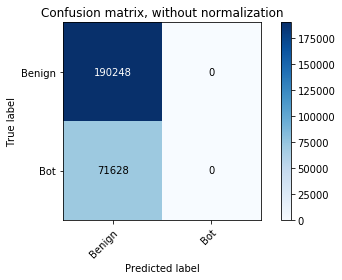

<Figure size 432x288 with 0 Axes>

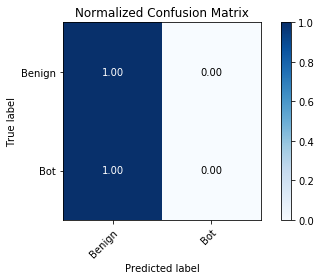

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from scipy.stats import zscore
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split # Use for StratifiedKFold classification
from sklearn import metrics
from IPython.display import display
from matplotlib.pyplot import figure, show
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
from numpy import arange, sin, pi
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels
%matplotlib inline

def plot_confusion_matrix(y_true, y_pred, classes,normalize=False,title=None,cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
# for j in df.columns:
#     if((j!='Label')&(j!='Timestamp')):
#         if(df[j].var()>500):
#             df[j]=zscore(df[j])
df=df.reindex(np.random.permutation(df.index))
split=np.random.rand(len(df))<0.75  #splitting as 75% and 25%
train_df=pd.DataFrame(df[split])
valid_df=pd.DataFrame(df[~split])
dummies=pd.get_dummies(train_df['Label']) #a is the fieldname
train_df=pd.concat([train_df,dummies],axis=1)
x=train_df[[ 'Dst Port','Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts','TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max','Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std','Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean','Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean','Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot','Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min','Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max','Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags','Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s','Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean','Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt','RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt','CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg','Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg','Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg','Bwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'Subflow Fwd Pkts','Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts','Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts','Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Active Max','Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min']].values #fields which are provided as input
y=dummies.values 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=6)
model = Sequential()
model.add(Dense(50,input_dim=x.shape[1], activation='relu',kernel_initializer='normal'))
model.add(Dense(25,input_dim=x.shape[1],activation='relu',kernel_initializer='normal'))
model.add(Dense(y.shape[1],activation='softmax',kernel_initializer='normal'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics =['accuracy'])
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5,verbose=1, mode='auto')
model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=2,epochs=1000)
dummies=pd.get_dummies(valid_df['Label'])
data=valid_df[[ 'Dst Port','Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts','TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max','Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std','Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean','Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean','Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot','Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min','Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max','Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags','Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s','Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean','Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt','RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt','CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg','Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg','Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg','Bwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'Subflow Fwd Pkts','Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts','Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts','Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Active Max','Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min']].values #fields which are provided as input
np.set_printoptions(suppress=True)  #to turn off scientific notation
expected=np.argmax(dummies.values,axis=1)
predicted=np.argmax(model.predict(data),axis=1)
score = metrics.accuracy_score(expected, predicted)
print("Validation score: {}".format(score))
score=metrics.log_loss(expected,predicted)
print(f"log loss score is : {score}")
plt.figure()
plot_confusion_matrix(expected, predicted,dummies.columns)
plt.figure()
plot_confusion_matrix(expected,predicted,dummies.columns,normalize=True, title='Normalized Confusion Matrix')
plt.show()
    # Any results you write to the current directory are saved as output.